In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import sklearn

In [2]:
# Kolumnit
abc = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [3]:
# .txt aikatiedostosta lista ajoista
def listFromTimeData(path):
    with open(path) as f:
        l = f.readlines()
    j = 0
    for c in l[1]:
        if c==':':
            break
        j += 1
    for i in range(len(l)):
        l[i]=float(l[i][j+2:j+7])
    return l

In [4]:
santeriTimeFiles = sorted(glob.glob('ajat/santeri1[0-7]*.txt'))
eliasTimeFiles = sorted(glob.glob('ajat/elias1[0-7]*.txt'))

In [5]:
# Dataframe ajoista. Kolumneilla kirjaimet

sdf = pd.DataFrame(columns=abc)
edf = pd.DataFrame(columns=abc)

for i in range(len(santeriTimeFiles)):
    sdf.loc[i] = listFromTimeData(santeriTimeFiles[i])
for i in range(len(eliasTimeFiles)):
    edf.loc[i] = listFromTimeData(eliasTimeFiles[i])
    
sdf.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.0,0.057,0.077,0.125,0.163,0.224,0.288,0.325,0.378,0.539,...,1.028,1.028,1.174,1.214,1.253,1.335,1.390,1.498,1.574,1.581
1,0.0,0.022,0.087,0.164,0.206,0.240,0.302,0.349,0.369,0.557,...,1.003,1.019,1.174,1.236,1.261,1.350,1.359,1.511,1.511,1.603
2,0.0,0.038,0.096,0.155,0.244,0.253,0.338,0.380,0.410,0.597,...,1.112,1.112,1.281,1.344,1.410,1.535,1.535,1.663,1.663,1.679
3,0.0,0.041,0.058,0.175,0.175,0.230,0.274,0.317,0.334,0.533,...,1.059,1.059,1.208,1.262,1.287,1.496,1.571,1.643,1.668,1.682
4,0.0,0.070,0.100,0.158,0.253,0.299,0.357,0.391,0.431,0.620,...,1.183,1.183,1.312,1.370,1.440,1.494,1.576,1.670,1.670,1.686


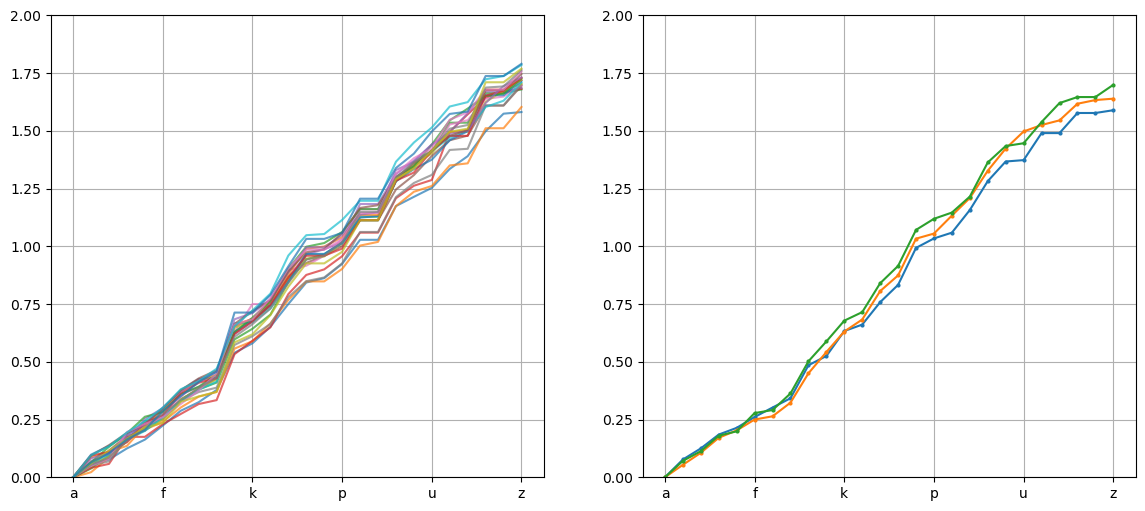

In [41]:
# Santeri vs Elias kaikki sub 1.8 ajat


fig, ax = plt.subplots(ncols=2, figsize=(14,6))
sdf.T.plot(ax=ax[0], legend=False, ylim=[0,2], alpha=0.7)
ax[0].grid()
edf.T.plot(ax=ax[1], legend=False, ylim=[0,2], marker='o', markersize=2)
ax[1].grid()

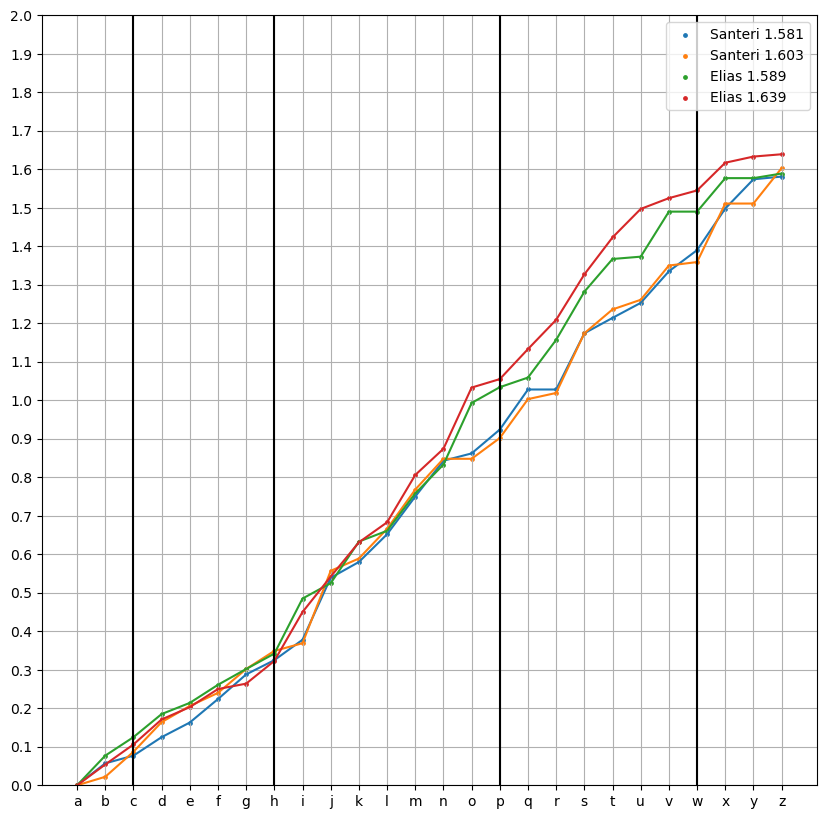

In [25]:
# Parhaimpien aikojen vertailuplotit

plt.figure(figsize=(10,10))

for i in range(2):
    plt.scatter(abc, sdf.T[i], s=6, label=f'Santeri {sdf.T[i][-1]}')
    plt.plot(sdf.T[i])
    
for i in range(2):
    plt.scatter(abc, edf.T[i], s=6, label=f'Elias {edf.T[i][-1]}')
    plt.plot(edf.T[i])

plt.ylim(0,2)
plt.yticks(np.linspace(0,2,21))

plt.axvline(x = 'c', color = 'black')
plt.axvline(x = 'h', color = 'black')
plt.axvline(x = 'p', color = 'black')
plt.axvline(x = 'w', color = 'black')

plt.grid()
plt.legend()
plt.show()

In [26]:
# Näppäinten erotus -dataframe

sdf_diff = pd.DataFrame(columns=abc[1:])
edf_diff = pd.DataFrame(columns=abc[1:])

for i in range(len(santeriTimeFiles)):
    l = listFromTimeData(santeriTimeFiles[i])
    l2 = []
    for j in range(len(l)-1):
        l2.append(l[j+1]-l[j])
    sdf_diff.loc[i] = l2
    
for i in range(len(eliasTimeFiles)):
    l = listFromTimeData(eliasTimeFiles[i])
    l2 = []
    for j in range(len(l)-1):
        l2.append(l[j+1]-l[j])
    edf_diff.loc[i] = l2

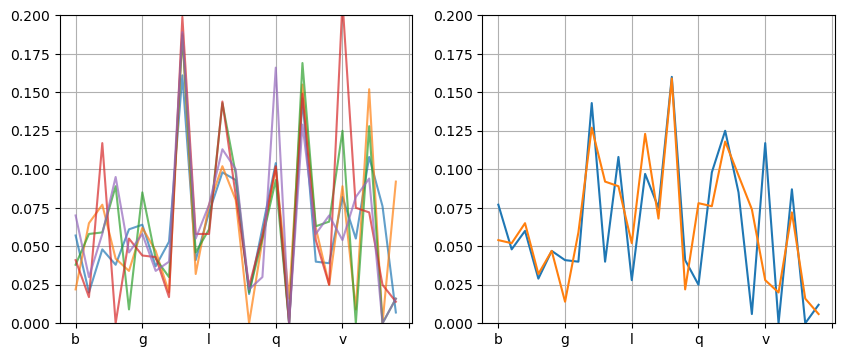

In [27]:
# Parhaimpien aikojen aika/kirjain vertailu
# Vertailussa Santerin 5 parasta aikaa ja Eliaksen 2 parasta aikaa

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sdf_diff[:5].T.plot(ax=ax[0], ylim=[0,0.2], legend=False, alpha=0.7)
ax[0].grid()
edf_diff[:2].T.plot(ax=ax[1], ylim=[0,0.2], legend=False)
ax[1].grid()

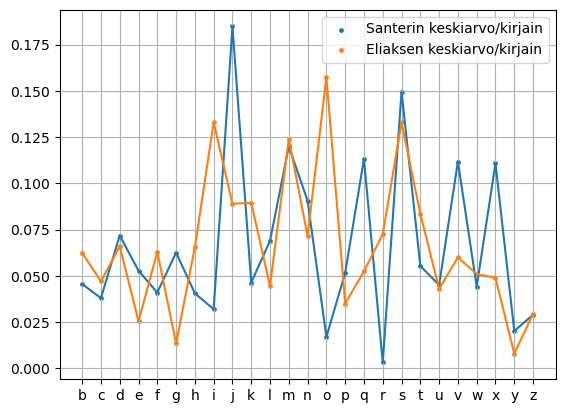

In [10]:
# Santeri vs Elias keskiarvoaika/kirjain
# Santerin 5 parasta aikaa ja Eliaksen 2 parasta aikaa

sMean = sdf_diff[:5].mean()
eMean = edf_diff[:2].mean()

plt.scatter(abc[1:], sMean, s=6, label='Santerin keskiarvo/kirjain')
plt.plot(sMean)

plt.scatter(abc[1:], eMean, s=6, label='Eliaksen keskiarvo/kirjain')
plt.plot(eMean)

plt.legend()
plt.grid()
plt.show()

In [11]:
sHuonoimmat = sMean.nlargest(25).index.values.tolist()
eHuonoimmat = eMean.nlargest(25).index.values.tolist()

In [12]:
sMean.nlargest(5)

j    0.1848
s    0.1496
m    0.1200
q    0.1132
v    0.1118
dtype: float64

In [13]:
eMean.nlargest(5)

o    0.1575
i    0.1330
s    0.1330
m    0.1240
k    0.0895
dtype: float64